# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# !cat api_keys.py

In [4]:
# geoapify_key


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

In [8]:
# weather_api_key


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(json.dumps(city_weather, indent=4, sort_keys=True))
        


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | qarazhal
Processing Record 3 of Set 1 | yashkul'
Processing Record 4 of Set 1 | utrik
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | vorgashor
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | colonia
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | grand-bassam
Processing Record 12 of Set 1 | olonkinbyen
Processing Record 13 of Set 1 | lihue
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | rabo de peixe
Processing Record 19 of Set 1 | hadibu
Processing Record 20 of Set 1 | callao
Processing Record 21 of Set 1 | le port
Processing Record 22 of Set 1 | bleckede
Processing Record 23 of Set 1 | klyuchi
Pr

Processing Record 42 of Set 4 | panama city beach
Processing Record 43 of Set 4 | port alfred
Processing Record 44 of Set 4 | al jawf
Processing Record 45 of Set 4 | south hedland
Processing Record 46 of Set 4 | durban
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | portland
Processing Record 49 of Set 4 | kitgum
Processing Record 0 of Set 5 | altai
Processing Record 1 of Set 5 | wailua homesteads
Processing Record 2 of Set 5 | nabire
Processing Record 3 of Set 5 | laminusa
Processing Record 4 of Set 5 | west island
Processing Record 5 of Set 5 | mankoeng
Processing Record 6 of Set 5 | avarua
Processing Record 7 of Set 5 | asau
Processing Record 8 of Set 5 | vorkuta
Processing Record 9 of Set 5 | freetown
Processing Record 10 of Set 5 | khandyga
Processing Record 11 of Set 5 | lanzhou
Processing Record 12 of Set 5 | woodward
Processing Record 13 of Set 5 | bathurst
Processing Record 14 of Set 5 | sunne
Processing Record 15 of Set 5 | leh
Processing Record 16 of 

Processing Record 33 of Set 8 | san juan
Processing Record 34 of Set 8 | amga
Processing Record 35 of Set 8 | radovis
Processing Record 36 of Set 8 | baiyin
Processing Record 37 of Set 8 | kingston
Processing Record 38 of Set 8 | mount gambier
Processing Record 39 of Set 8 | ulanhot
Processing Record 40 of Set 8 | skovorodino
Processing Record 41 of Set 8 | khanbari
Processing Record 42 of Set 8 | vershino-darasunskiy
Processing Record 43 of Set 8 | gardez
Processing Record 44 of Set 8 | takamaka
City not found. Skipping...
Processing Record 45 of Set 8 | cidreira
Processing Record 46 of Set 8 | fort st. john
Processing Record 47 of Set 8 | nuuk
Processing Record 48 of Set 8 | sao joao da barra
Processing Record 49 of Set 8 | dolisie
Processing Record 0 of Set 9 | zouerate
Processing Record 1 of Set 9 | armacao de buzios
Processing Record 2 of Set 9 | neiafu
Processing Record 3 of Set 9 | veinticinco de mayo
Processing Record 4 of Set 9 | santo antonio do ica
Processing Record 5 of Set

Processing Record 21 of Set 12 | ushtobe
Processing Record 22 of Set 12 | maun
Processing Record 23 of Set 12 | saint-joseph
Processing Record 24 of Set 12 | tonala
Processing Record 25 of Set 12 | rostovka
Processing Record 26 of Set 12 | an nuhud
Processing Record 27 of Set 12 | dryden
Processing Record 28 of Set 12 | pirallahi
Processing Record 29 of Set 12 | nouadhibou
Processing Record 30 of Set 12 | colac
Processing Record 31 of Set 12 | saudarkrokur
Processing Record 32 of Set 12 | ves'yegonsk
Processing Record 33 of Set 12 | happy valley-goose bay
Processing Record 34 of Set 12 | kalabo
Processing Record 35 of Set 12 | hazebrouck
Processing Record 36 of Set 12 | achikulak
Processing Record 37 of Set 12 | sittwe
Processing Record 38 of Set 12 | kapa'a
Processing Record 39 of Set 12 | trebaseleghe
Processing Record 40 of Set 12 | loa janan
Processing Record 41 of Set 12 | bandon
Processing Record 42 of Set 12 | mutsu
Processing Record 43 of Set 12 | papao
Processing Record 44 of 

In [10]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()



City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [11]:
# Display sample data
city_data_df.head()




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,13.29,67,13,4.74,SH,1701122661
1,qarazhal,48.0078,70.7903,5.74,53,100,5.68,KZ,1701122790
2,yashkul',46.1711,45.3435,4.26,72,25,4.63,RU,1701122790
3,utrik,11.2278,169.8474,27.65,74,73,9.23,MH,1701122790
4,stanley,54.8680,-1.6985,5.29,92,75,6.17,GB,1701122704


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,13.29,67,13,4.74,SH,1701122661
1,qarazhal,48.0078,70.7903,5.74,53,100,5.68,KZ,1701122790
2,yashkul',46.1711,45.3435,4.26,72,25,4.63,RU,1701122790
3,utrik,11.2278,169.8474,27.65,74,73,9.23,MH,1701122790
4,stanley,54.8680,-1.6985,5.29,92,75,6.17,GB,1701122704


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

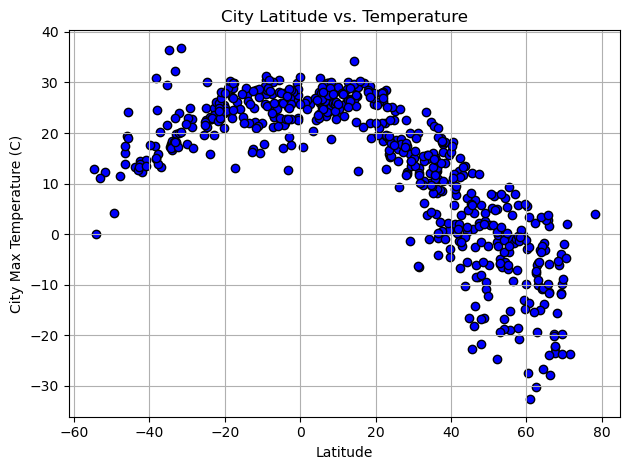

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("City Max Temperature (C)")
plt.title("City Latitude vs. Temperature")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

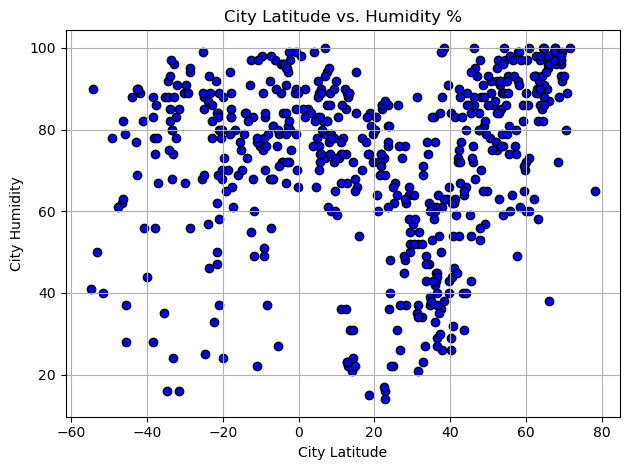

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],  marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("City Humidity")
plt.title("City Latitude vs. Humidity %")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

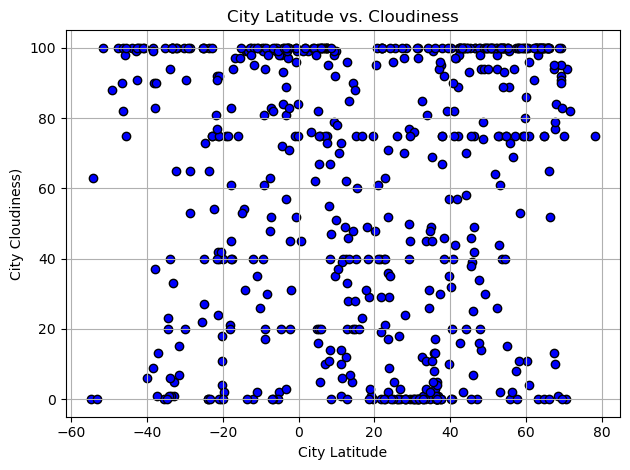

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

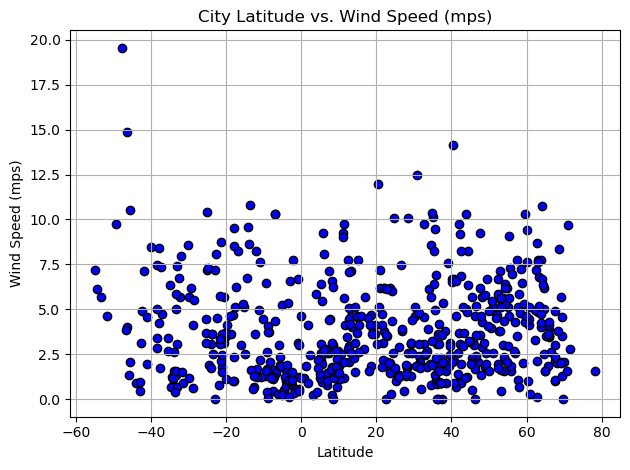

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
plt.title("City Latitude vs. Wind Speed (mps)")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def linear_reg(x_values, y_values, x_label):
#     x_values = northern_hemi_df['Max Temp']
#     y_values = northern_hemi_df['Lat']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(-20,0.8),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel('City Latitude')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qarazhal,48.0078,70.7903,5.74,53,100,5.68,KZ,1701122790
2,yashkul',46.1711,45.3435,4.26,72,25,4.63,RU,1701122790
3,utrik,11.2278,169.8474,27.65,74,73,9.23,MH,1701122790
4,stanley,54.8680,-1.6985,5.29,92,75,6.17,GB,1701122704
6,vorgashor,67.5833,63.9500,-22.30,98,10,2.12,RU,1701122662


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,13.29,67,13,4.74,SH,1701122661
5,puerto natales,-51.7236,-72.4875,12.25,40,100,4.63,CL,1701122685
9,ushuaia,-54.8000,-68.3000,12.81,41,0,7.20,AR,1701122532
15,adamstown,-25.0660,-130.1015,22.65,85,100,10.41,PN,1701122664
19,callao,-12.0667,-77.1500,22.16,68,0,8.23,PE,1701122794


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
def linear_reg(x_value, y_value, x_label)

The r-squared is: 0.7522569250361342


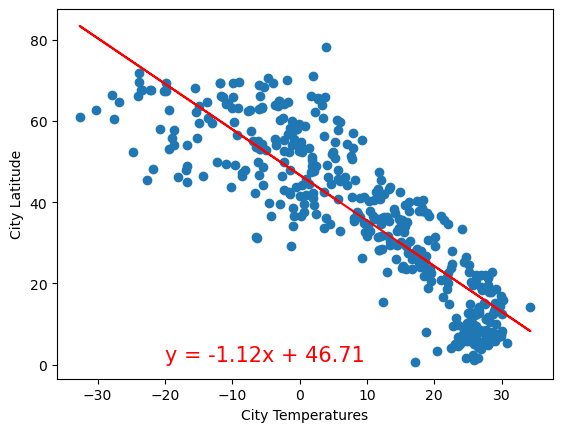

In [30]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Max Temp']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,0.8),fontsize=15,color="red")
plt.xlabel('City Temperatures')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3556590957356487


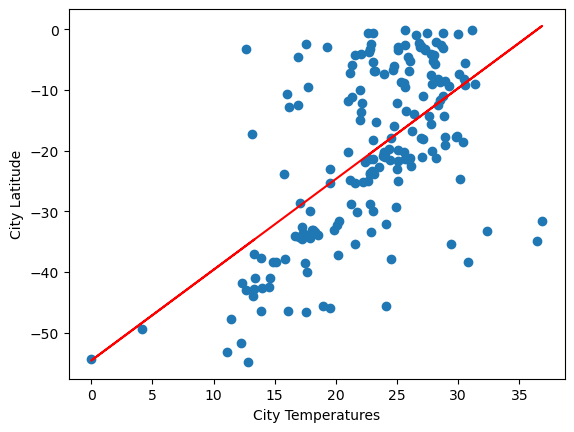

In [32]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Max Temp'],southern_hemi_df['Lat'], "City Temperatures")



**Discussion about the linear relationship:** The Northern hemisphere has a very strong correlation between temperature and latitude as can be seen from the scatterplots above - the closer the latitude to the equator, the higher the temperature goes while conversely, the further away, the colder it gets! The r-squared score of the Northern hemi is almost 0.8.
In the Southern hemisphere, the r-squared score is less than 0.4 but there is still a relatively strong correlation between higher temperatures and distance from the equator.


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.07345057228384302


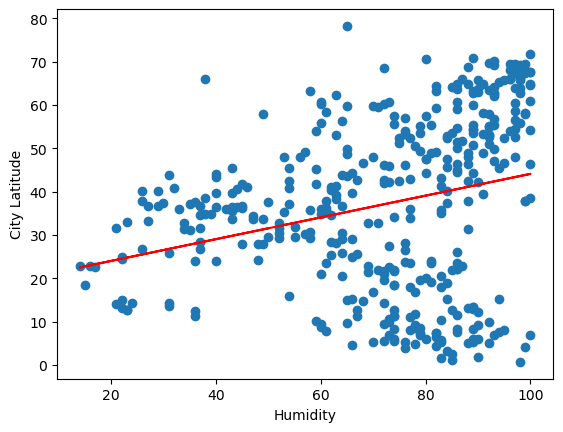

In [33]:
# Northern Hemisphere

linear_reg(northern_hemi_df['Humidity'],northern_hemi_df['Lat'], "Humidity")



The r-squared is: 0.044974413634325805


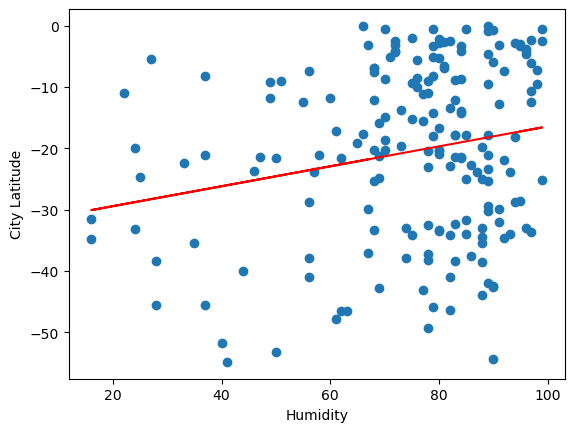

In [34]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Humidity'],southern_hemi_df['Lat'], "Humidity")


**Discussion about the linear relationship:** There is a very slightly positive relationship between humidity and latitude in both the Northern and Southern Hemispheres as can be seen from the plots although both r-squared scores are less than 0.1 indicating that the relationship is not very strong.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05254996444910359


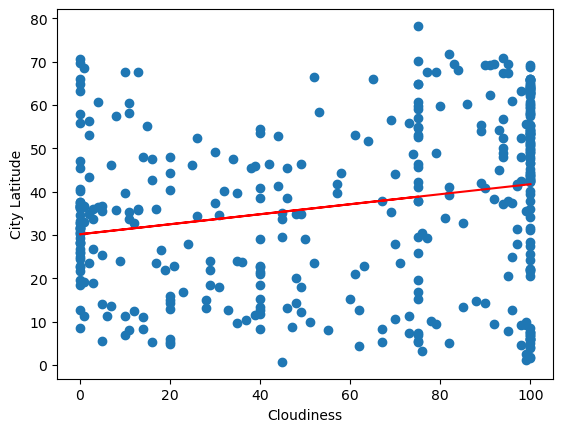

In [35]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Cloudiness'],northern_hemi_df['Lat'], "Cloudiness")

The r-squared is: 0.004488975244493396


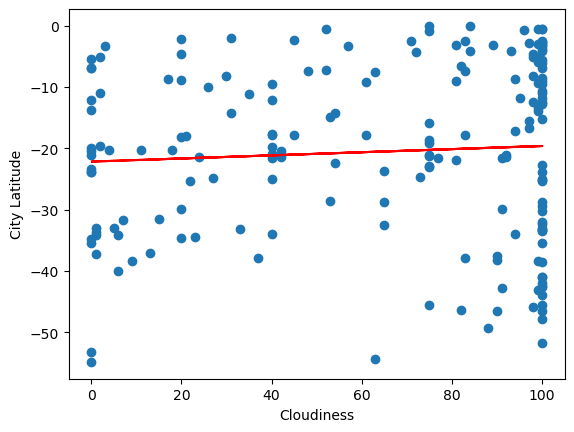

In [37]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Cloudiness'],southern_hemi_df['Lat'], "Cloudiness")


**Discussion about the linear relationship:** There is not a strong positive or negative correlation between Cloudiness and Latitude. Both scatterplots show almost perfectly horizontal lines and the r-squared scores are both ~ 0.03, solidifying this point.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.015154950331567265


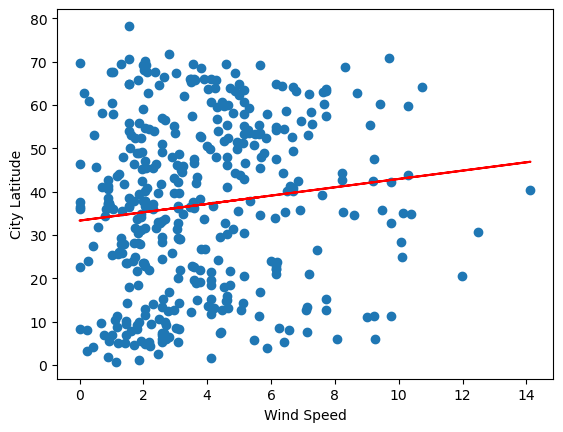

In [38]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Wind Speed'],northern_hemi_df['Lat'], "Wind Speed")

The r-squared is: 0.004488975244493396


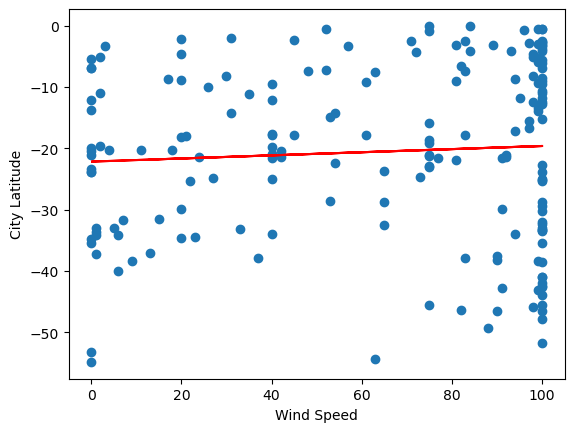

In [40]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Cloudiness'],southern_hemi_df['Lat'], "Wind Speed")

**Discussion about the linear relationship:** There does not appear to be a strong positive or negative correlation between wind speed and latitude in either hemisphere.